# Báciso de Tensorflow - Parte 1 

## "Hello Word" das Redes Neurais

In [1]:
import tensorflow as tf 

Rede Neural mais simples, com apenas um neurônio. Usando o pacote Keras, a palavra ```Dense``` define uma camada de neurônios conectada 

In [2]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[1])])

Vamos agora definir duas importantes funções para o nosso modelo: a função de otimização (*optimizer*), responsável por reduzir, da melhor maneira, a função de perda (*loss function*), que também seráe scolhida nessa etapa.

In [3]:
model.compile(optimizer='sgd',loss='mean_squared_error')

### Aplicando em valores reais
Tentaremos agora, aplicar essa rede neural simples e ver se ela é capaz de identificar a relação entre X e Y. 
OBS: Se você usar SUA rede neural (rs) você pode perceber que Y=2X-1 

In [4]:
import numpy as np
X=np.array([-1,0,1,2,3,4])
y=np.array([-3,-1,1,3,5,7])

### Fitando o modelo
Vamos agora, aplicar o modelo. Note que "fitamos" da mesma forma que fazemos com modelos tradicionais.

In [5]:
model.fit(X,y,epochs=1500)
# epoch --> quantidade de vezes que vamos passar pelo loop de treino 

===========================] - 0s 1ms/sample - loss: 1.0604e-11
Epoch 1279/1500
6/6 [==============================] - 0s 1ms/sample - loss: 1.0604e-11
Epoch 1280/1500
6/6 [==============================] - 0s 1ms/sample - loss: 1.0604e-11
Epoch 1281/1500
6/6 [==============================] - 0s 599us/sample - loss: 1.0604e-11
Epoch 1282/1500
6/6 [==============================] - 0s 551us/sample - loss: 1.0604e-11
Epoch 1283/1500
6/6 [==============================] - 0s 520us/sample - loss: 1.0604e-11
Epoch 1284/1500
6/6 [==============================] - 0s 398us/sample - loss: 1.0604e-11
Epoch 1285/1500
6/6 [==============================] - 0s 525us/sample - loss: 1.0604e-11
Epoch 1286/1500
6/6 [==============================] - 0s 472us/sample - loss: 1.0604e-11
Epoch 1287/1500
6/6 [==============================] - 0s 377us/sample - loss: 1.0604e-11
Epoch 1288/1500
6/6 [==============================] - 0s 412us/sample - loss: 1.0604e-11
Epoch 1289/1500
6/6 [===================

### Fazendo uma predição
Assim como fazemos com modelos tradicionais de ML:

In [6]:
print(model.predict([10]))

[[18.999987]]


## Utilizando uma Rede Neural em um Dataset padrão
Agora vamos ver como uma rede neural se sai em um dataset pequeno (iris dataset).

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data=load_iris()
X=data.data
y=data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Montando a Rede Neural e definindo optimizador e loss

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=3,input_shape=(4,),activation='sigmoid')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

### Fitando o modelo

In [9]:
model.fit(X_train,y_train,epochs=400)

==========================] - 0s 89us/sample - loss: 0.7256
Epoch 176/400
100/100 [==============================] - 0s 108us/sample - loss: 0.7239
Epoch 177/400
100/100 [==============================] - 0s 112us/sample - loss: 0.7222
Epoch 178/400
100/100 [==============================] - 0s 76us/sample - loss: 0.7200
Epoch 179/400
100/100 [==============================] - 0s 108us/sample - loss: 0.7184
Epoch 180/400
100/100 [==============================] - 0s 112us/sample - loss: 0.7169
Epoch 181/400
100/100 [==============================] - 0s 77us/sample - loss: 0.7154
Epoch 182/400
100/100 [==============================] - 0s 91us/sample - loss: 0.7136
Epoch 183/400
100/100 [==============================] - 0s 81us/sample - loss: 0.7118
Epoch 184/400
100/100 [==============================] - 0s 85us/sample - loss: 0.7102
Epoch 185/400
100/100 [==============================] - 0s 92us/sample - loss: 0.7086
Epoch 186/400
100/100 [==============================] - 0s 76us/s

## Predições e métricas

In [10]:
y_pred=model.predict(X_test)

y_pred_class = np.argmax(y_pred,axis=1)


from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_class))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [11]:
print(confusion_matrix(y_test,y_pred_class))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


## Tensorflow para visão computacional: Fashion MNIST 
Vamos agora aplicar o básico de visão computacional para mexer com imagens 28x28

In [12]:
fashion=tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion.load_data()

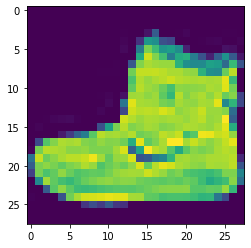

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [13]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()

print(train_images[0])

### Montando nosso modelo
Note que, diferentemente do modelo anterior, temos uma ```Flatten``` Layer, essa é responsável por transformar os dados de uma imagem (uma matriz 28x28 no nosso caso), em um vetor linear e simples, para que seja possível as outras camadas processarem esses dados de forma mais fácil.

In [14]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

## Normalizando dados
Uma vez que, como visto no exemplo acima, a matriz que compõe a imagem, consiste em dividir tons por meio de números entre 0 e 255, e sabendo que é computacionalmente mais eficiente usarmos dados normalizados, vamos dividir esses números por 255.

In [15]:
train_images=train_images/255
test_images=test_images/255

#### Escolhendo alguns hiperparâmetros e fitando o modelo

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy')

model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4936
Epoch 2/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3731
Epoch 3/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3359
Epoch 4/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.3113
Epoch 5/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2943


In [17]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 50us/sample - loss: 0.3666


0.36655034141540527

## Definindo uma Callback
Quando rodamos a rede neural um número considerável de vezes, podemos fazer com que a rede neural se atenha muito aos dados de treino, o que pode causar overfitting. Para contornar isso, criamos um Callback, no qual o treino da rede para de acrodo com alguma considção estipulada por nós, veja aqui um exemplo 

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.4):
            print('Loss já está considerávelmente baixa, vamos parar com o treino!')
            self.model.stop_training = True

### Aplicando isso no modelo anterior

In [19]:
callbacks=myCallback()

model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])



model.compile(optimizer=tf.keras.optimizers.Adam(),loss='sparse_categorical_crossentropy')

model.fit(train_images,train_labels,epochs=5,callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4974
Epoch 2/5
60000/60000 [==============================] - 5s 91us/sample - loss: 0.3748


In [20]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3680


0.3679655978679657

## Redes Neurais Convolucionais
Para classificar imagens, fazer a rede neural "enchergar" não só pixel por pixel, mas sim um conjunto de pixels, também é extremamente necessário para identificar padrões em uma imagem. Para isso, temos as redes neurais Convolucionais.

Para salvar um ponco de tempo, e espaço no notebook, o guia de Redes Neurais Convolucionais está [aqui](https://drive.google.com/drive/u/0/folders/1796ypkWaMgC3fkojBPx96JOK1gDPqnBu)!

Vamos para a sua aplicação

In [21]:
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)

In [22]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy')

In [25]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
59904/60000 [============================>.] - ETA: 0s - loss: 0.43860000/60000 [==============================] - 51s 844us/sample - loss: 0.4383
Epoch 2/5
60000/60000 [==============================] - 54s 902us/sample - loss: 0.2981
Epoch 3/5
60000/60000 [==============================] - 60s 1000us/sample - loss: 0.2529
Epoch 4/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2217
Epoch 5/5
60000/60000 [==============================] - 58s 960us/sample - loss: 0.1920


In [26]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 3s 278us/sample - loss: 0.2528


0.2527861744105816